In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import sys, os

## Measurements by Tony Hessels for holes to be used as reference for the new mapping


In [33]:
# points_Cycl_center = points_Cycl_center.T
# MSR_CENTER = np.array([34527.4688, 2890.5609, -1362.6374]) #mm [x,y,z]

NameArr = ['Point Name', 'x original', 'y original', 'z original', 'x MSR', 'y MSR', 'z MSR']

# measuments in mm
basePoints = pd.read_csv('Plate Hole Locations.csv', skiprows=3, usecols=[0,2,3,4,6,7,8], 
                         names=NameArr, index_col='Point Name')
basePoints = basePoints[basePoints.index.notnull()]

basePoints.loc[['L (G)', 'L (R)']]

basePoints = basePoints.rename(index={'MSR center (on ground)': 'MSR center'})

In [34]:
# basePoints

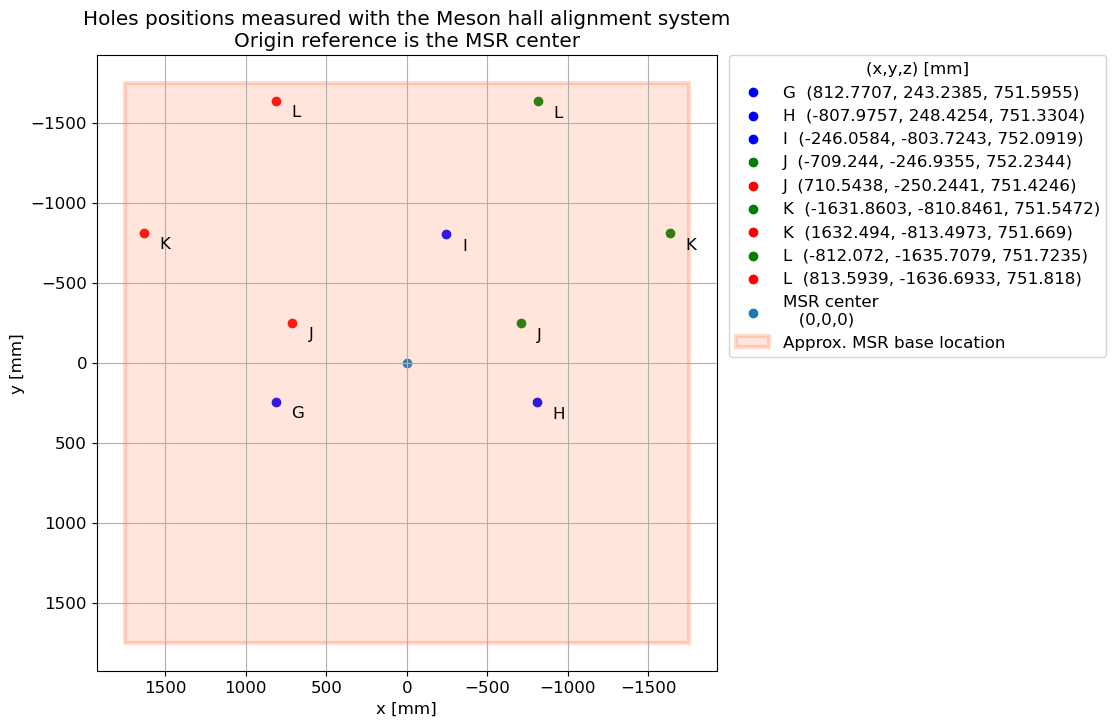

In [49]:
fig, ax = plt.subplots(figsize=(8,8))
txtshx = -0.1*1000
txtshy = 0.1*1000
plt.rcParams.update({'font.size': 12})

# plt.scatter(points_Cycl_center[0], points_Cycl_center[1])
for i, txt in enumerate(basePoints.index[:-2]):
#     print(txt[-2])
    if txt[-2]=='B':
        c= 'blue'
    elif txt[-2]=='R':
        c= 'red'
    elif txt[-2]=='G':
        c= 'green'
        
    plt.scatter(basePoints.loc[txt][3], basePoints.loc[txt][4], color=c, 
        label=txt[:2]+ f" ({basePoints.loc[txt][3]}, {basePoints.loc[txt][4]}, {basePoints.loc[txt][5]})")
    ax.annotate(txt[:2], # f" ({points_Cycl_center[0][i]:.3}, {points_Cycl_center[1][i]:.3})", \
                (basePoints.loc[txt][3], basePoints.loc[txt][4]), 
                xytext=(basePoints.loc[txt][3]+txtshx, basePoints.loc[txt][4]+txtshy))

# MSR_shift = -51.67/100 #m
ax.scatter(basePoints.loc['MSR center'][3], basePoints.loc['MSR center'][4], label=f"MSR center\n   (0,0,0)")

# ax.annotate(f'MSR center', # \n({MSR_CENTER[0]:.4},{MSR_CENTER[1]:.4})', 
#             (MSR_CENTER[0]+txtshx-0.25, MSR_CENTER[1]+txtshy))

# Create a Rectangle patch
sideLength = 3.5*1000 #mm
rect = patches.Rectangle((-sideLength/2+basePoints.loc['MSR center'][3], -sideLength/2+basePoints.loc['MSR center'][4]), 
            sideLength, sideLength, linewidth=3, edgecolor='orangered', facecolor='coral', alpha=0.2,
                         label="Approx. MSR base location")
# ax.annotate('Approx. MSR placement', (-1.6, 1.8))

# Add the patch to the Axes
ax.add_patch(rect)
ax.set_title("Holes positions measured with the Meson hall alignment system"+
             "\nOrigin reference is the MSR center")

# Lx = basePoints.loc['L (R)']
# xlim = [-1400, Lx[3]+500]
# ylim = [Lx[4]-100, 1600]
# axis_rangex = np.arange(xlim[0], xlim[1], 400)
# axis_rangey = np.arange(ylim[0], ylim[1], 400)
# ax.set_xticks(axis_rangex)
# ax.set_yticks(axis_rangey)

plt.legend(title="(x,y,z) [mm]", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.set_xlabel("x [mm]")
ax.set_ylabel("y [mm]")

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()


plt.grid()
# print(38000 - 32500)
# print(4800 - 0)
#setting limits to get a square grid
# ax.set_xlim(xlim[0], xlim[1])
# ax.set_ylim(ylim[0], ylim[1])
plt.savefig('plots/holePositions.pdf', bbox_inches='tight')#, dpi=100)

plt.show()

In [36]:
#using L as origin

In [37]:
#quick math as we set up

In [38]:
toply = 124.5 #cm
ply=1.8

toBase=toply+ply
toBase

126.3

In [39]:
Mark_130 = toBase+1.1
Mark_130

127.39999999999999

## what we actually mapped

In [40]:
colNames = ['x', 'y', 'z','B_x', 'B_y', 'B_z']

#the properly orientated data
file_22 = "data_export/map_referencedMSR_fall2022_seperate_interp50.txt"
data_22 = pd.read_csv(file_22, comment='#', sep='\t', names=colNames)

In [41]:
#seperate into red and green data
sep = -35 #cm
data_22_red = data_22[data_22['x'] > sep]
data_22_green = data_22[data_22['x'] < sep]

minY_22_red = np.min(data_22_red['y'])
maxY_22_red = np.max(data_22_red['y'])

minY_22_green = np.min(data_22_green['y'])
maxY_22_green = np.max(data_22_green['y'])


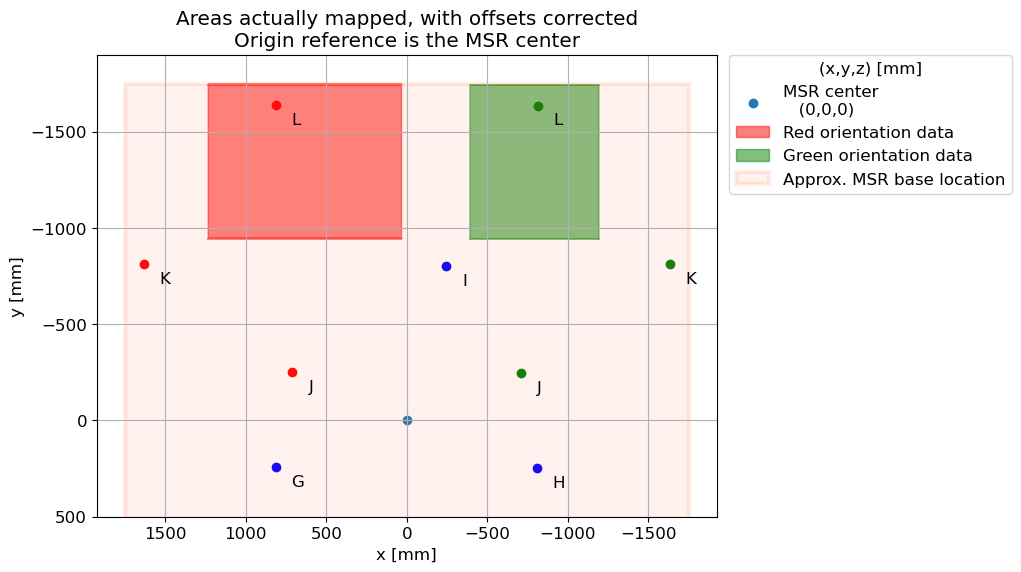

In [48]:
fig, ax = plt.subplots(figsize=(8,6))
txtshx = -0.1*1000
txtshy = 0.1*1000
plt.rcParams.update({'font.size': 12})

for i, txt in enumerate(basePoints.index[:-2]):
    if txt[-2]=='B':
        c= 'blue'
    elif txt[-2]=='R':
        c= 'red'
    elif txt[-2]=='G':
        c= 'green'
        
    plt.scatter(basePoints.loc[txt][3], basePoints.loc[txt][4], color=c)#, 
    ax.annotate(txt[:2],
                (basePoints.loc[txt][3], basePoints.loc[txt][4]), 
                xytext=(basePoints.loc[txt][3]+txtshx, basePoints.loc[txt][4]+txtshy))

ax.scatter(basePoints.loc['MSR center'][3], basePoints.loc['MSR center'][4], label=f"MSR center\n   (0,0,0)")


ax.fill_between(data_22_red['x']*10, minY_22_red*10, maxY_22_red*10, color='r',alpha=.5, label='Red orientation data')
ax.fill_between(data_22_green['x']*10, minY_22_green*10, maxY_22_green*10, color='g',alpha=.5, label='Green orientation data')


# Create a Rectangle patch
sideLength = 3.5*1000 #mm
rect = patches.Rectangle((-sideLength/2+basePoints.loc['MSR center'][3], -sideLength/2+basePoints.loc['MSR center'][4]), 
            sideLength, sideLength, linewidth=3, edgecolor='orangered', facecolor='coral', alpha=0.1, label="Approx. MSR base location")

# Add the patch to the Axes
ax.add_patch(rect)
ax.set_title("Areas actually mapped, with offsets corrected"+
             "\nOrigin reference is the MSR center")

plt.legend(title="(x,y,z) [mm]", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.set_xlabel("x [mm]")
ax.set_ylabel("y [mm]")

ax.set_ylim(-1900, 500)

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.grid()


plt.savefig('plots/mappedPositions.pdf', bbox_inches='tight')

plt.show()

In [43]:
# import svgutils.transform as sg
# # import sys 

# # #create new SVG figure
# fig = sg.SVGFigure("16cm", "6.5cm")

# # # load matpotlib-generated figures
# fig1 = sg.fromfile('./plots/mappingfall2022.svg')

# # get the plot objects
# plot1 = fig1.getroot()

# # append plots and labels to figure
# fig.append([plot1])
# # fig.append([txt1, txt2])

# # save generated SVG files
# fig.save("fig_final.svg")

# plt.show()